# Lung Cancer Detection using Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Collection

In [3]:
df = pd.read_csv('survey lung cancer.csv')

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.shape

(309, 16)

In [8]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

### Data Preprocessing

In [10]:
df.duplicated().sum()

33

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(276, 16)

In [13]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [14]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

print("Continuous columns:", con_col)
print("Categorical columns:", cat_col)

Continuous columns: ['AGE']
Categorical columns: ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


### Exploratory Data Analysis (EDA)

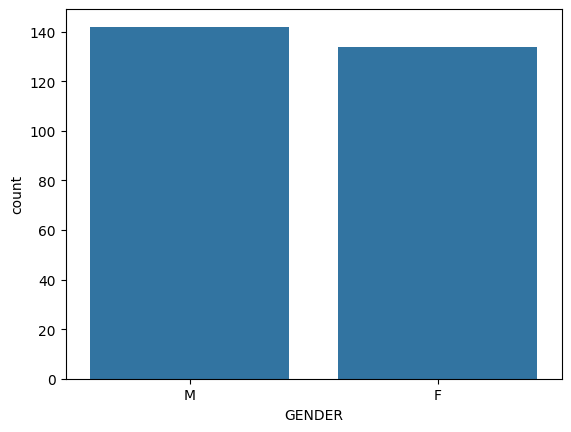

In [15]:
sns.countplot(x ='GENDER', data=df)
plt.show()

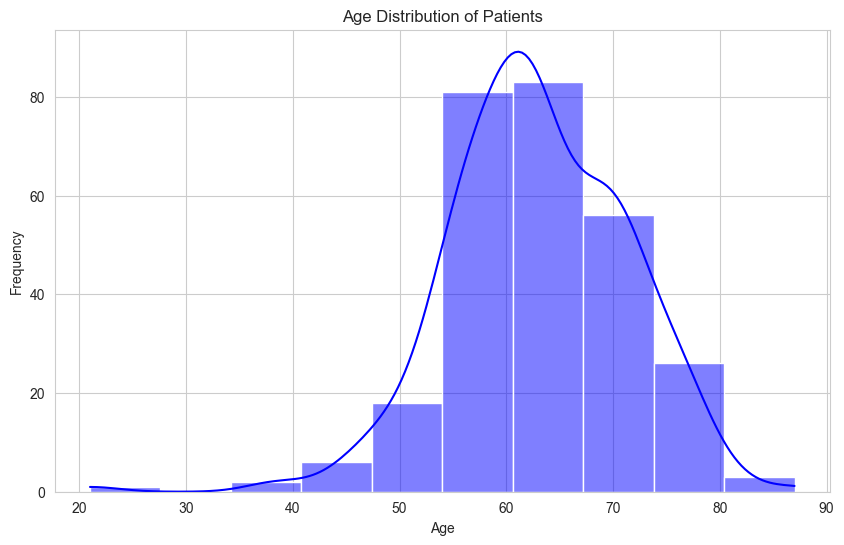

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize = (10,6))
sns.histplot(df['AGE'],kde = True, color = 'blue', bins = 10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

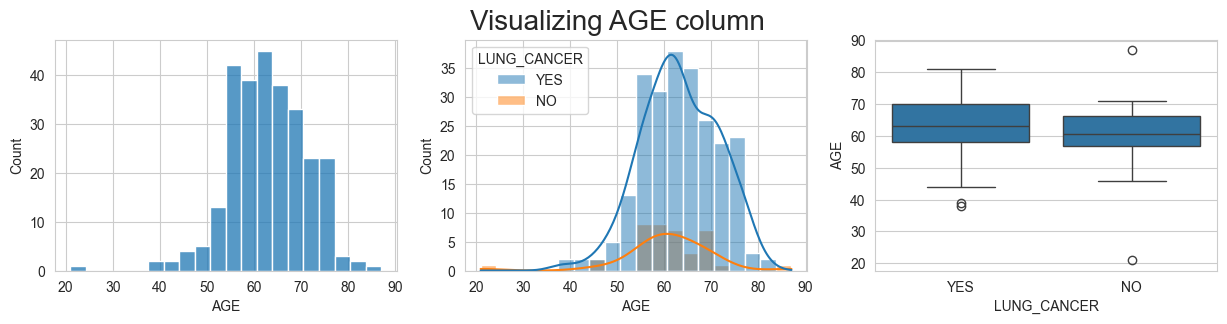

In [17]:
fig,ax = plt.subplots(1,3,figsize=(15,3))
sns.histplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Text(0.5, 0.98, 'Visualizing Categorical Columns')

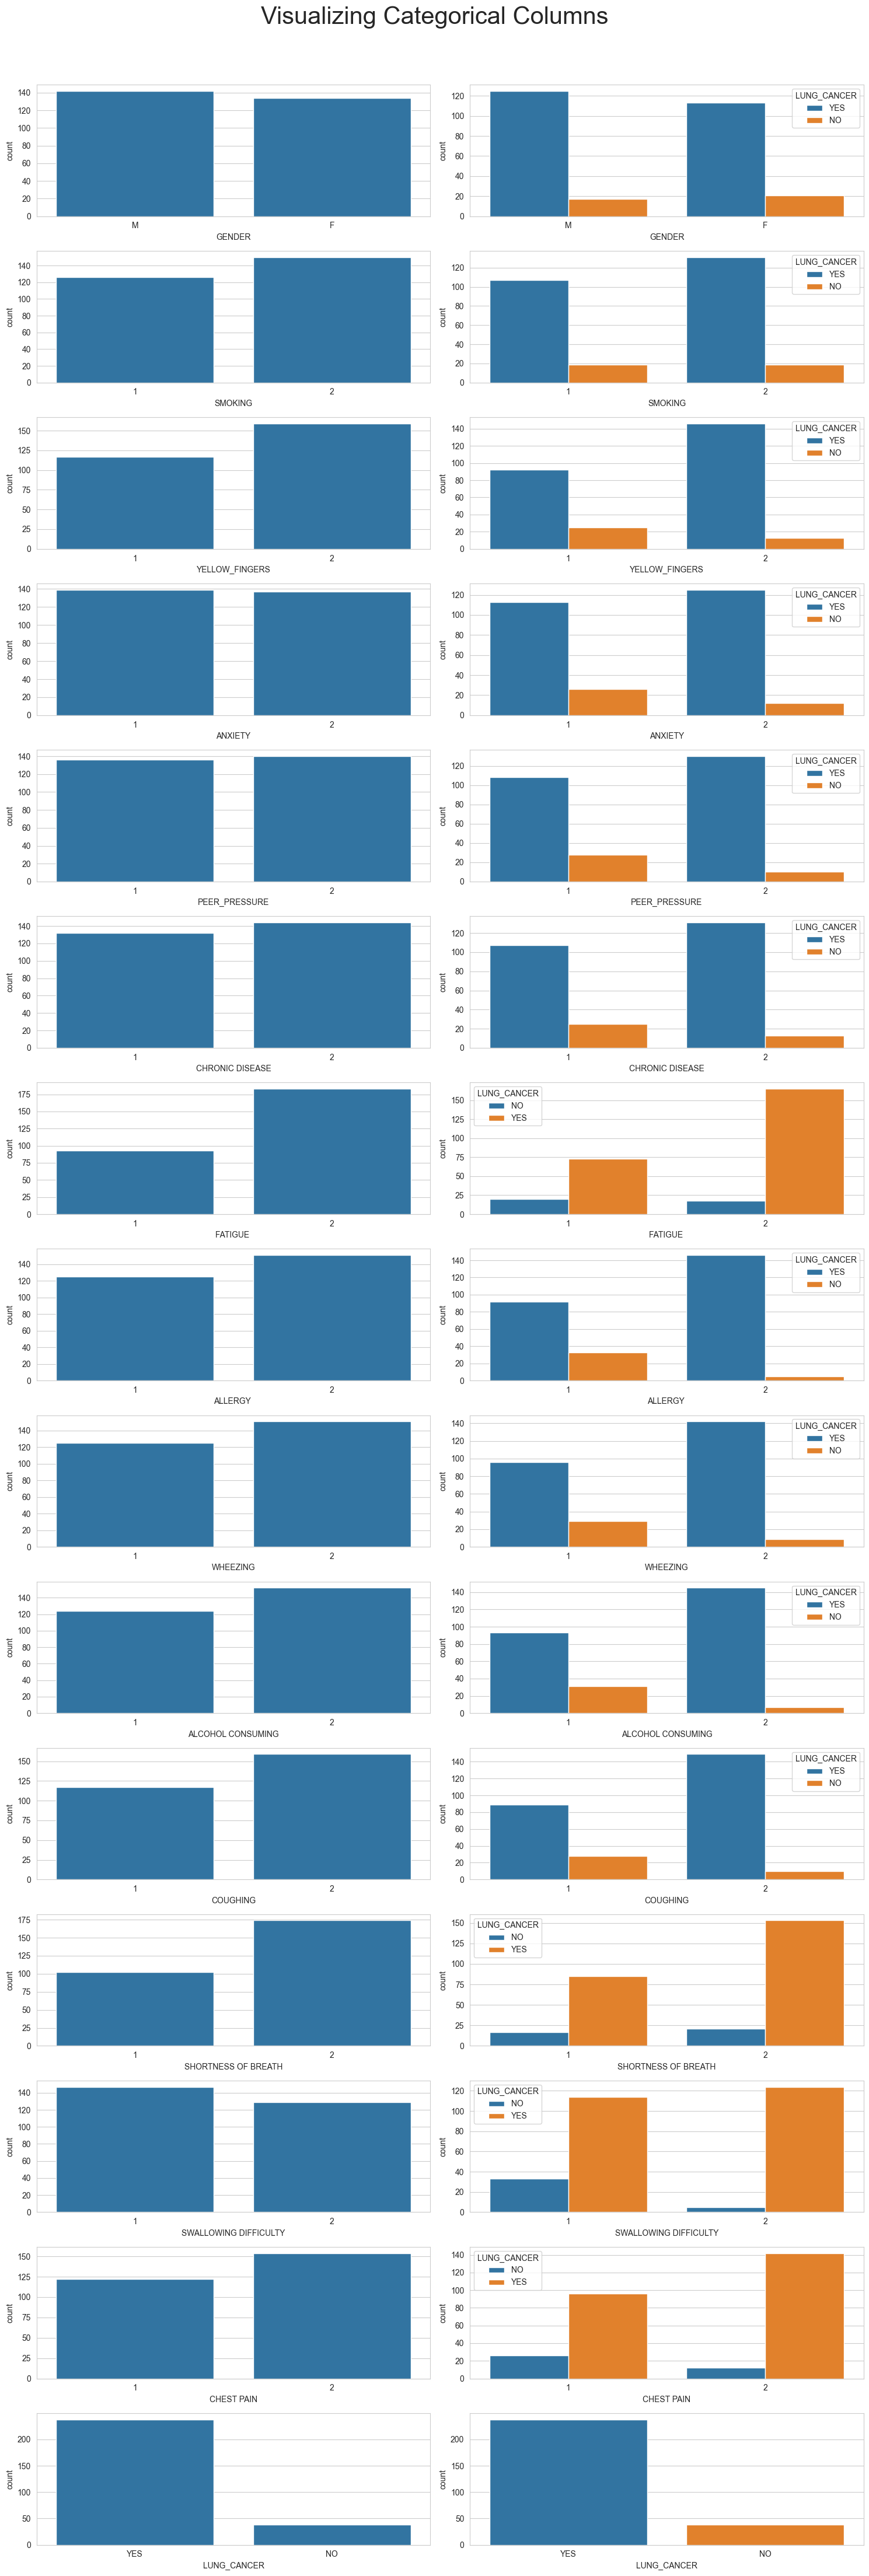

In [18]:
fig,ax = plt.subplots(15,2,figsize=(15,45))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=30)

Text(0.5, 0.98, 'Visualizing Age vs Categorical Columns')

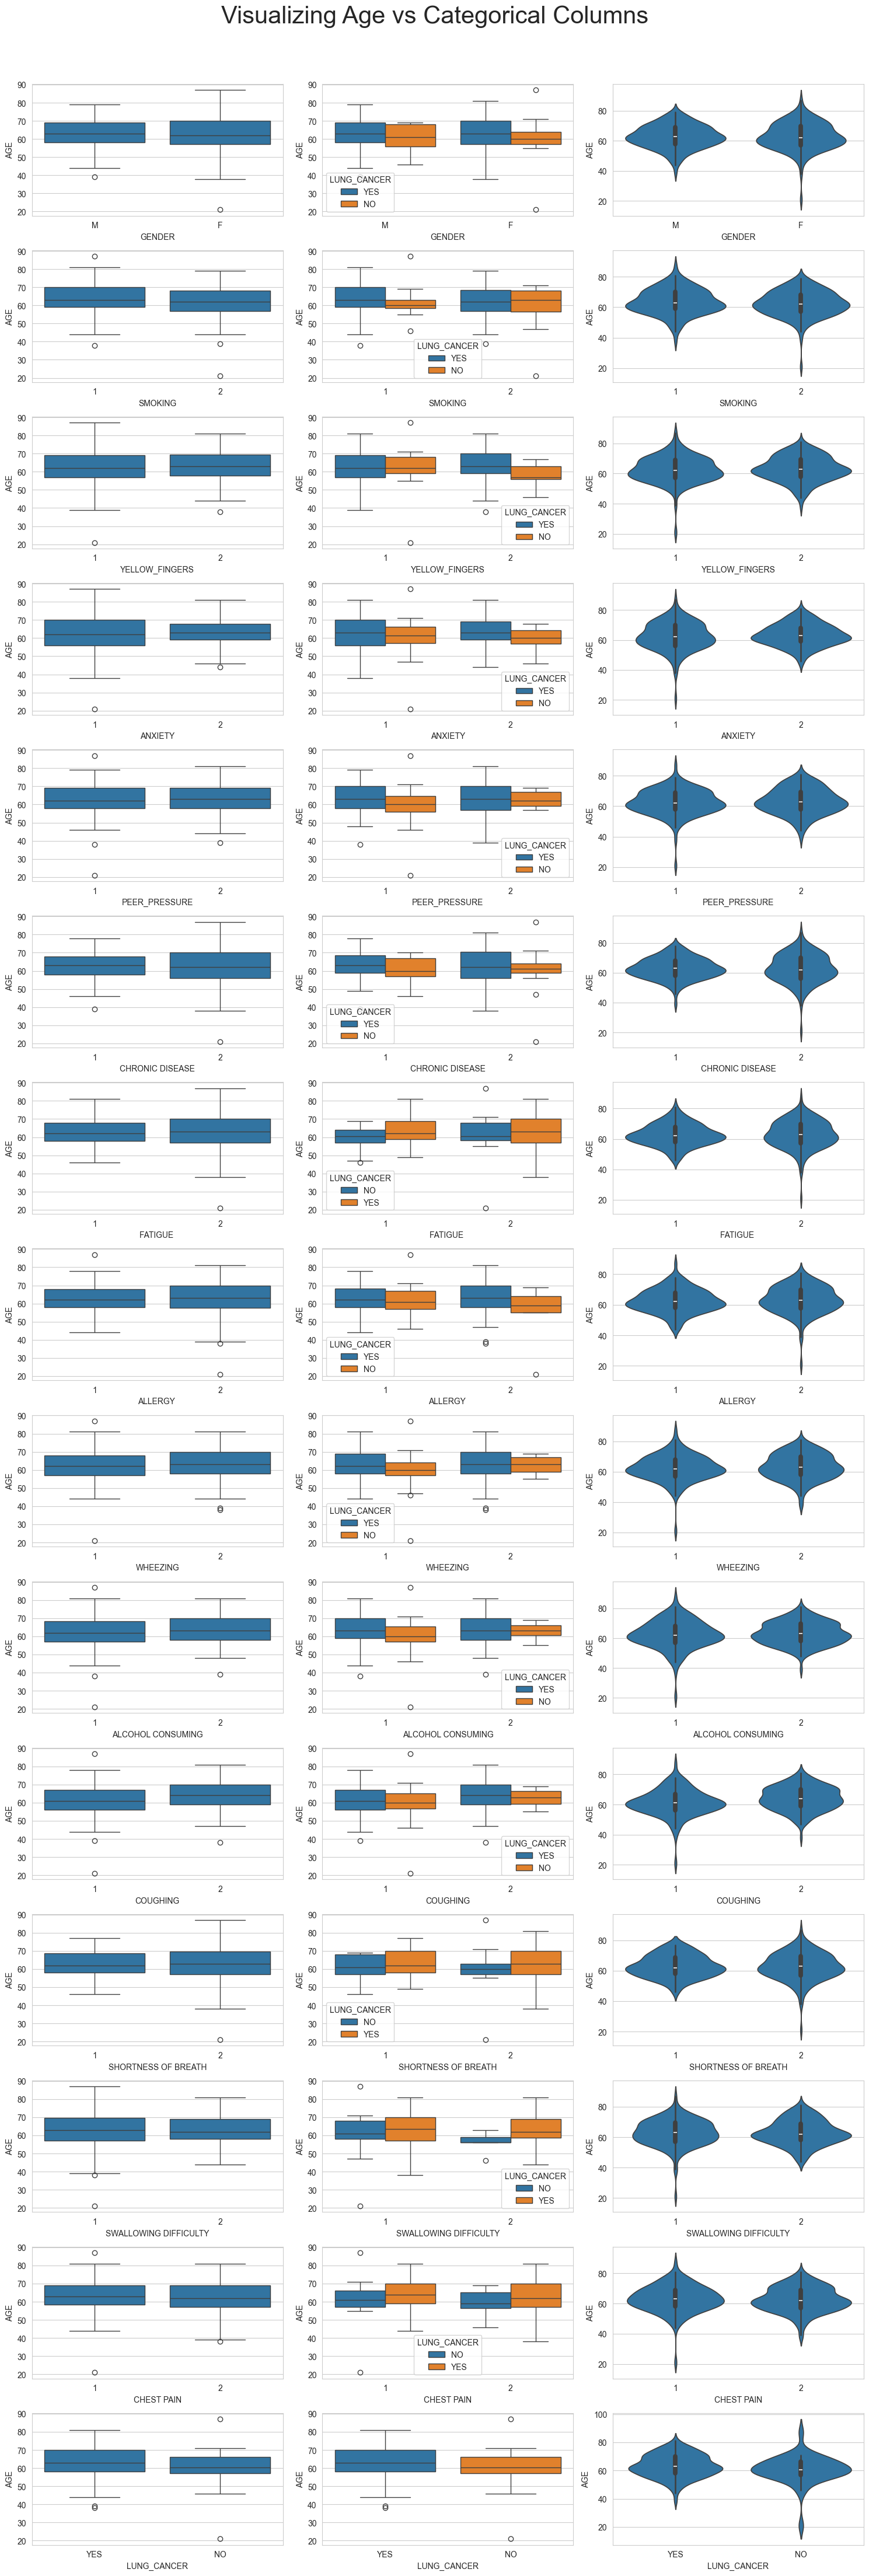

In [19]:
fig,ax = plt.subplots(15,3,figsize=(15,45))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Age vs Categorical Columns",fontsize=30)

In [20]:
label_encoders ={}
categorical_columns = ['GENDER', 'LUNG_CANCER']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: >

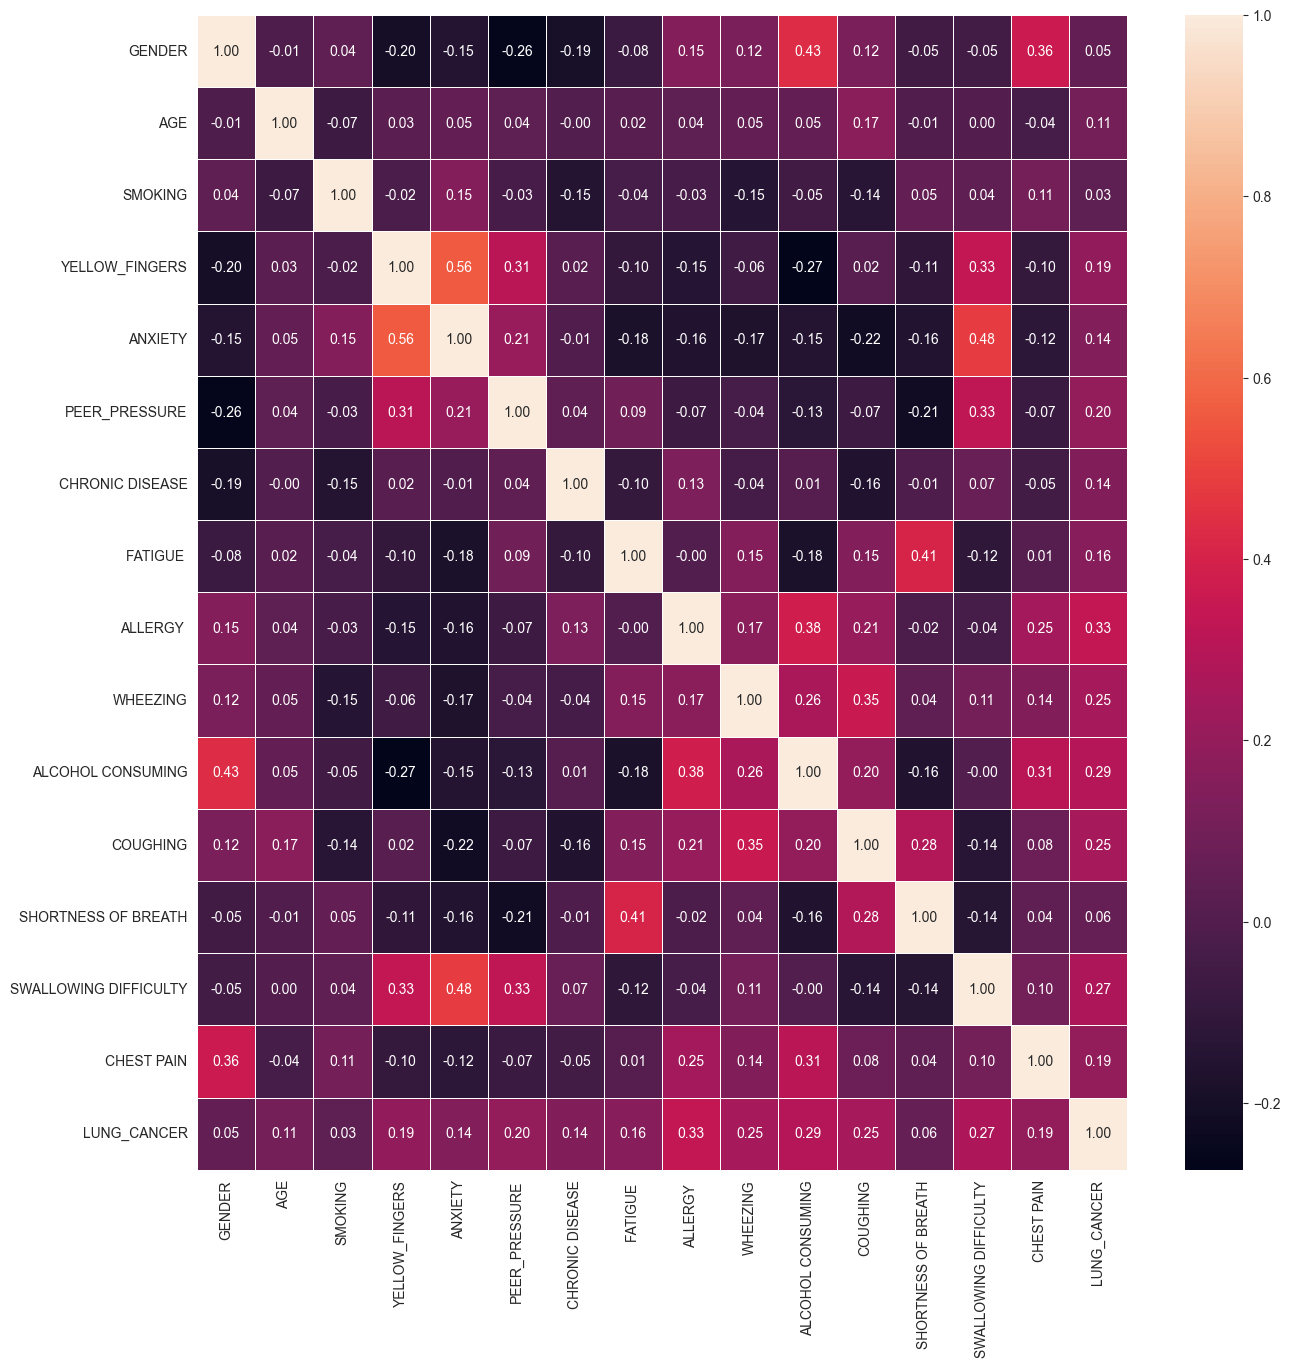

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [22]:
x=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [23]:
for i in x.columns[2:]:
    temp=[]
    for j in x[i]:
        temp.append(j-1)
    x[i]=temp
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [24]:
x,y

(     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 0         1   69        0               1        1              0   
 1         1   74        1               0        0              0   
 2         0   59        0               0        0              1   
 3         1   63        1               1        1              0   
 4         0   63        0               1        0              0   
 ..      ...  ...      ...             ...      ...            ...   
 279       0   59        0               1        1              1   
 280       0   59        1               0        0              0   
 281       1   55        1               0        0              0   
 282       1   46        0               1        1              0   
 283       1   60        0               1        1              0   
 
      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
 0                  0         1         0         1                  1   
 1        

In [25]:
#handling imbalance in dataset
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(x,y)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,0.098324,1,0,0,1,0,0,0,0,0,1,1,0,0
336,0,0.216511,1,1,0,1,1,0,0,0,0,0,0,0,0
334,1,-1.792675,1,1,0,0,1,0,0,0,0,0,0,0,1
151,0,0.216511,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,-0.610801,1,1,0,0,0,0,0,0,0,0,1,0,0


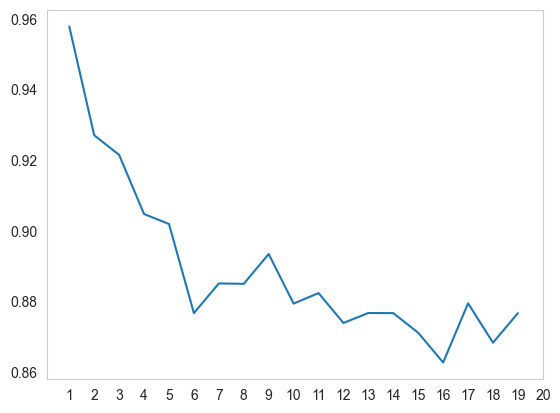

In [28]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

### Model Training and Evaluation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.26, random_state=42, stratify=y)

In [31]:
# Defining classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


Training and evaluating Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.92      0.98      0.95        62

    accuracy                           0.92        72
   macro avg       0.88      0.74      0.79        72
weighted avg       0.91      0.92      0.91        72

Accuracy for Logistic Regression: 91.67%


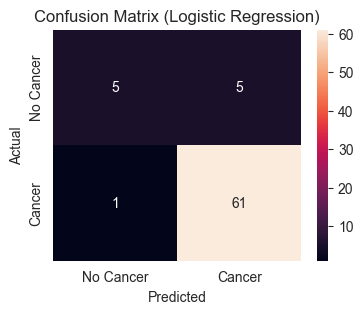


Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.97      0.94      0.95        62

    accuracy                           0.92        72
   macro avg       0.82      0.87      0.84        72
weighted avg       0.93      0.92      0.92        72

Accuracy for Decision Tree: 91.67%


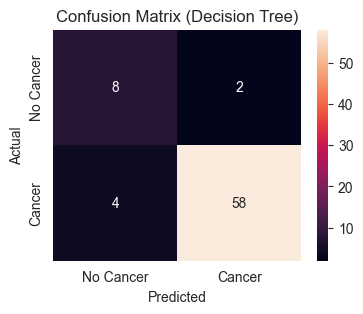


Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.97      0.97      0.97        62

    accuracy                           0.94        72
   macro avg       0.88      0.88      0.88        72
weighted avg       0.94      0.94      0.94        72

Accuracy for Random Forest: 94.44%


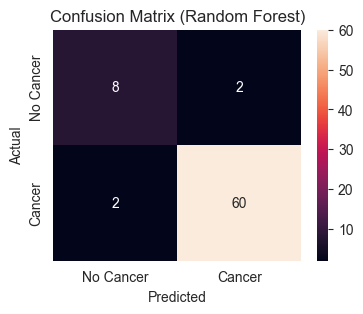


Training and evaluating Support Vector Machine...

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.86      1.00      0.93        62

    accuracy                           0.86        72
   macro avg       0.43      0.50      0.46        72
weighted avg       0.74      0.86      0.80        72

Accuracy for Support Vector Machine: 86.11%


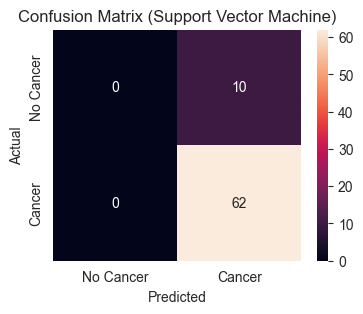


Training and evaluating Naive Bayes...

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.94      0.97      0.95        62

    accuracy                           0.92        72
   macro avg       0.84      0.78      0.81        72
weighted avg       0.91      0.92      0.91        72

Accuracy for Naive Bayes: 91.67%


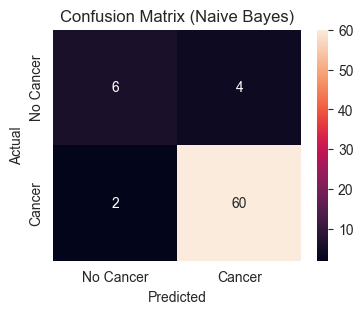


Training and evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.90      0.98      0.94        62

    accuracy                           0.89        72
   macro avg       0.82      0.64      0.68        72
weighted avg       0.88      0.89      0.87        72

Accuracy for K-Nearest Neighbors: 88.89%


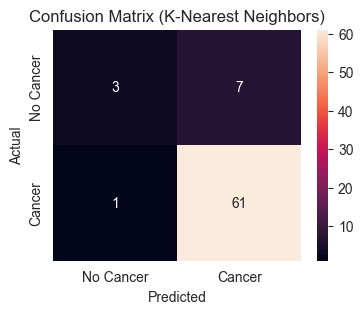

In [32]:
results = {}
models = {}

for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...\n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    models[name] = clf
    
    # Classification report and confusion matrix
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    results[name] = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy for {name}: {results[name] * 100:.2f}%')
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=["No Cancer", "Cancer"],
                yticklabels=["No Cancer", "Cancer"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

In [33]:
#Tuning hyperparameters using RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Defining parameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Support Vector Machine': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf','poly','sigmoid']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}




Tuning hyperparameters for Logistic Regression...

Best Parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.94      0.97      0.95        62

    accuracy                           0.92        72
   macro avg       0.84      0.78      0.81        72
weighted avg       0.91      0.92      0.91        72

Accuracy for Logistic Regression: 91.67%


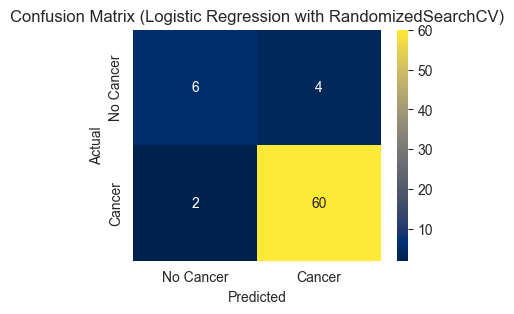


Tuning hyperparameters for Decision Tree...

Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.88      0.98      0.93        62

    accuracy                           0.88        72
   macro avg       0.78      0.59      0.62        72
weighted avg       0.85      0.88      0.84        72

Accuracy for Decision Tree: 87.50%


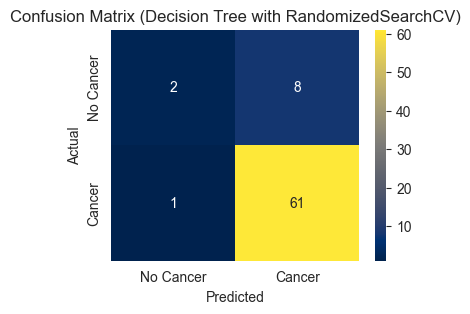


Tuning hyperparameters for Random Forest...

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.92      0.98      0.95        62

    accuracy                           0.92        72
   macro avg       0.88      0.74      0.79        72
weighted avg       0.91      0.92      0.91        72

Accuracy for Random Forest: 91.67%


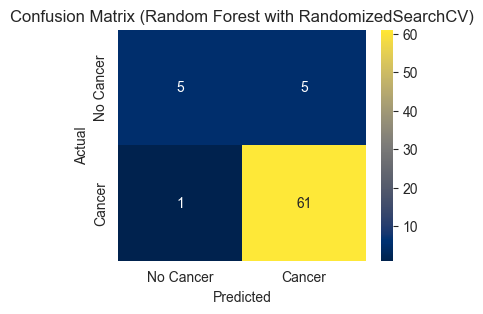


Tuning hyperparameters for Support Vector Machine...

Best Parameters for Support Vector Machine: {'kernel': 'linear', 'gamma': 1, 'C': 100}

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.94      0.95      0.94        62

    accuracy                           0.90        72
   macro avg       0.80      0.78      0.79        72
weighted avg       0.90      0.90      0.90        72

Accuracy for Support Vector Machine: 90.28%


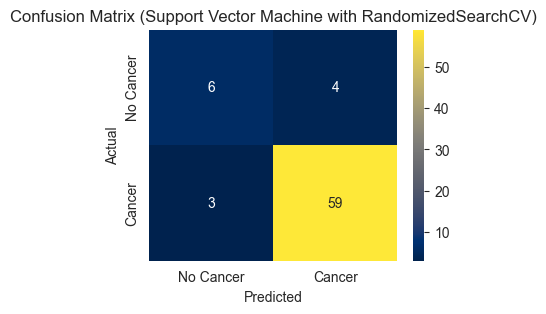


Tuning hyperparameters for Naive Bayes...


Tuning hyperparameters for K-Nearest Neighbors...

Best Parameters for K-Nearest Neighbors: {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.90      1.00      0.95        62

    accuracy                           0.90        72
   macro avg       0.95      0.65      0.70        72
weighted avg       0.91      0.90      0.88        72

Accuracy for K-Nearest Neighbors: 90.28%


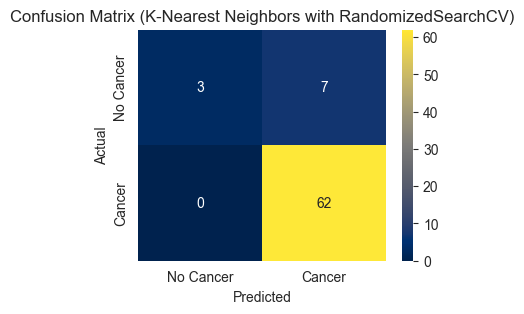

In [36]:
tuned_results = {}
models = {}


for name, clf in classifiers.items():
    print(f"\nTuning hyperparameters for {name}...\n")
    if name in param_grids:
        param_grid = param_grids[name]
        rcv = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)
        rcv.fit(X_train, y_train)
        best_clf = rcv.best_estimator_
        models[name] = best_clf
        y_pred = best_clf.predict(X_test)

        # Classification report and confusion matrix
        print(f"Best Parameters for {name}: {rcv.best_params_}\n")
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        tuned_results[name] = accuracy_score(y_test, y_pred)
        
        print(f'Accuracy for {name}: {tuned_results[name] * 100:.2f}%')
        
        #confusion matrix
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='cividis',
                    xticklabels=['No Cancer', 'Cancer'],
                    yticklabels=['No Cancer', 'Cancer'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({name} with RandomizedSearchCV)')
        plt.show()

In [37]:
#Tuning hyperparameters using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grids_refined = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [20, 30, 40],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [20, 30],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'bootstrap': [True]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}


Further tuning hyperparameters for Logistic Regression with GridSearchCV...

Best Parameters for Logistic Regression after GridSearchCV: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.95      0.97      0.96        62

    accuracy                           0.93        72
   macro avg       0.87      0.83      0.85        72
weighted avg       0.93      0.93      0.93        72

Accuracy for Logistic Regression: 93.06%


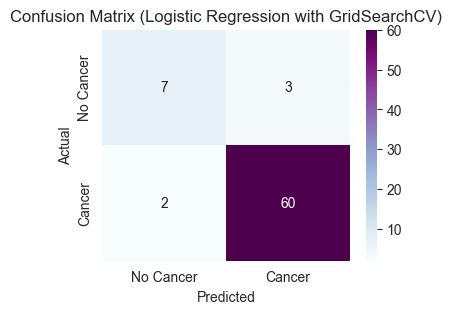


Further tuning hyperparameters for Decision Tree with GridSearchCV...

Best Parameters for Decision Tree after GridSearchCV: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.88      0.95      0.91        62

    accuracy                           0.85        72
   macro avg       0.64      0.58      0.59        72
weighted avg       0.81      0.85      0.82        72

Accuracy for Decision Tree: 84.72%


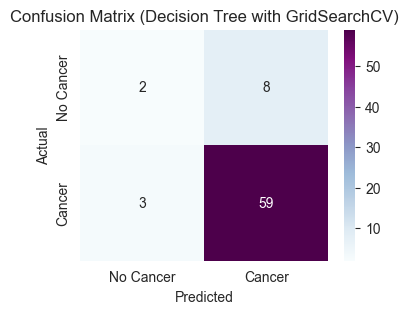


Further tuning hyperparameters for Random Forest with GridSearchCV...

Best Parameters for Random Forest after GridSearchCV: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.90      1.00      0.95        62

    accuracy                           0.90        72
   macro avg       0.95      0.65      0.70        72
weighted avg       0.91      0.90      0.88        72

Accuracy for Random Forest: 90.28%


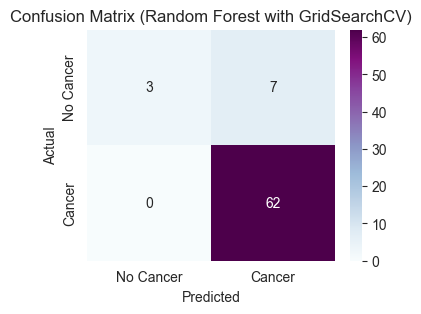


Further tuning hyperparameters for Support Vector Machine with GridSearchCV...

Best Parameters for Support Vector Machine after GridSearchCV: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.89      1.00      0.94        62

    accuracy                           0.89        72
   macro avg       0.94      0.60      0.64        72
weighted avg       0.90      0.89      0.86        72

Accuracy for Support Vector Machine: 88.89%


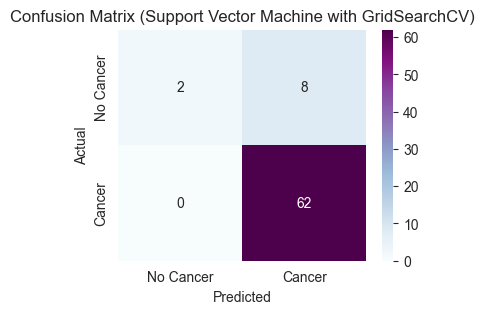


Further tuning hyperparameters for K-Nearest Neighbors with GridSearchCV...

Best Parameters for K-Nearest Neighbors after GridSearchCV: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.93      1.00      0.96        62

    accuracy                           0.93        72
   macro avg       0.96      0.75      0.81        72
weighted avg       0.94      0.93      0.92        72

Accuracy for K-Nearest Neighbors: 93.06%


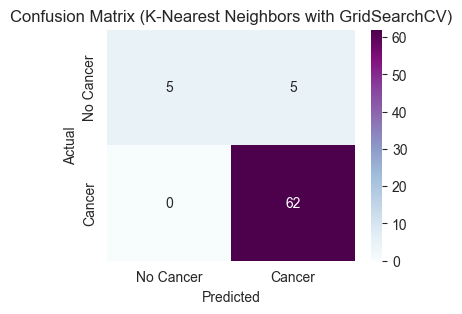

In [40]:
further_tuned_results = {}

for name, best_clf in models.items():
    if name in param_grids_refined:
        print(f"\nFurther tuning hyperparameters for {name} with GridSearchCV...\n")
        param_grid = param_grids_refined[name]
        grid_search = GridSearchCV(best_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_
        models[name] = best_clf
        y_pred = best_clf.predict(X_test)
        
        # Classification report and confusion matrix
        print(f"Best Parameters for {name} after GridSearchCV: {grid_search.best_params_}\n")
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        further_tuned_results[name] = accuracy_score(y_test, y_pred)
        
        print(f'Accuracy for {name}: {further_tuned_results[name] * 100:.2f}%')
        
        #confusion matrix
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
                    xticklabels=['No Cancer', 'Cancer'],
                    yticklabels=['No Cancer', 'Cancer'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({name} with GridSearchCV)')
        plt.show()


In [41]:
#Combining all results
combined_results = {**results, **tuned_results,**further_tuned_results}

#Determining the best classifier based on accuracy
best_classifier = max(combined_results, key=combined_results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {combined_results[best_classifier]:.4f}')

Best Classifier: Logistic Regression with Accuracy: 0.9306


### Model Performance Analysis

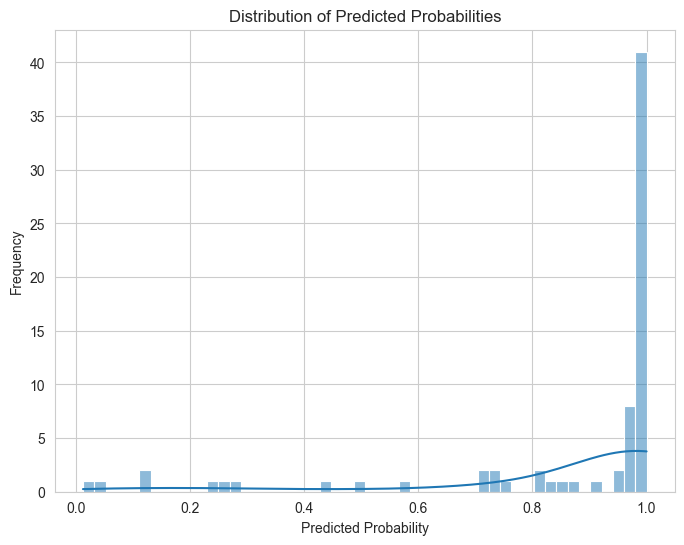

In [42]:
best_model = models[best_classifier]

y_prob_best_model = best_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
sns.histplot(y_prob_best_model, kde=True, bins=50)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

### Model Evaluation

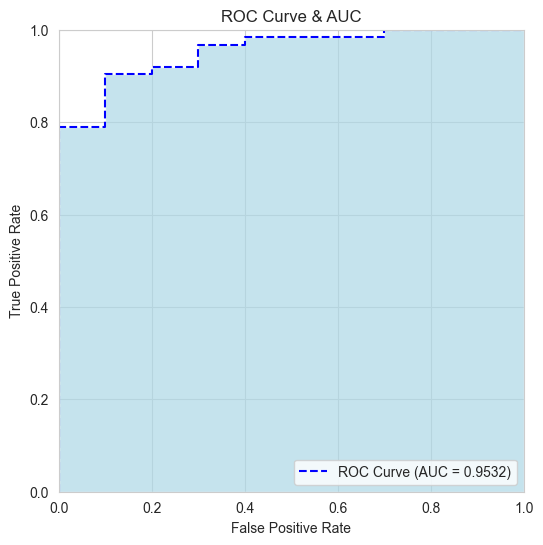

In [43]:
import matplotlib.pyplot as plt
from sklearn import metrics

#ROC curve
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,y_prob_best_model)

#AUC score
auc = metrics.roc_auc_score(y_test,y_prob_best_model)

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(false_positive_rate, true_positive_rate, 'b--', label=f'ROC Curve (AUC = {auc:.4f})')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve & AUC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [44]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [45]:
print("Best Score: ",grid_search.best_score_)

Best Score:  0.8775609756097561


In [46]:
best_model= grid_search.best_estimator_
print("Best Model: ", best_model)

Best Model:  KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')


In [47]:
from sklearn.metrics import classification_report
#converting probability predictions into binary predictions
threshold = 0.5
y_pred_binary = (y_prob_best_model >= threshold).astype(int)

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.95      0.97      0.96        62

    accuracy                           0.93        72
   macro avg       0.87      0.83      0.85        72
weighted avg       0.93      0.93      0.93        72



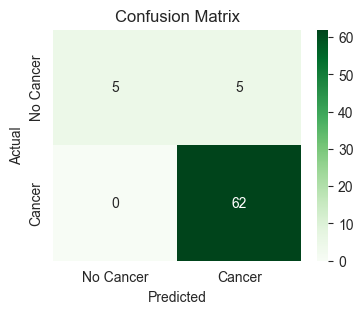

In [48]:
y_pred = best_model.predict(X_test)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Cancer', 'Cancer'], 
            yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Feature Importance

In [49]:
param_grid = {
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [50]:
from sklearn.ensemble import AdaBoostClassifier

base_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

adaboost_clf = AdaBoostClassifier(estimator=base_dt, n_estimators=50, random_state=42)

In [51]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   random_state=42)

In [52]:
y_pred = adaboost_clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9028
Precision: 0.8990
Recall: 0.9028
F1 Score: 0.9006
Confusion Matrix:
 [[ 6  4]
 [ 3 59]]


In [53]:
adaboost_clf.feature_importances_

array([0.00409423, 0.13069884, 0.01029765, 0.13218378, 0.01981088,
       0.0291761 , 0.16268895, 0.2662004 , 0.06352208, 0.00730716,
       0.08462679, 0.02973838, 0.01128533, 0.0326392 , 0.01573023])

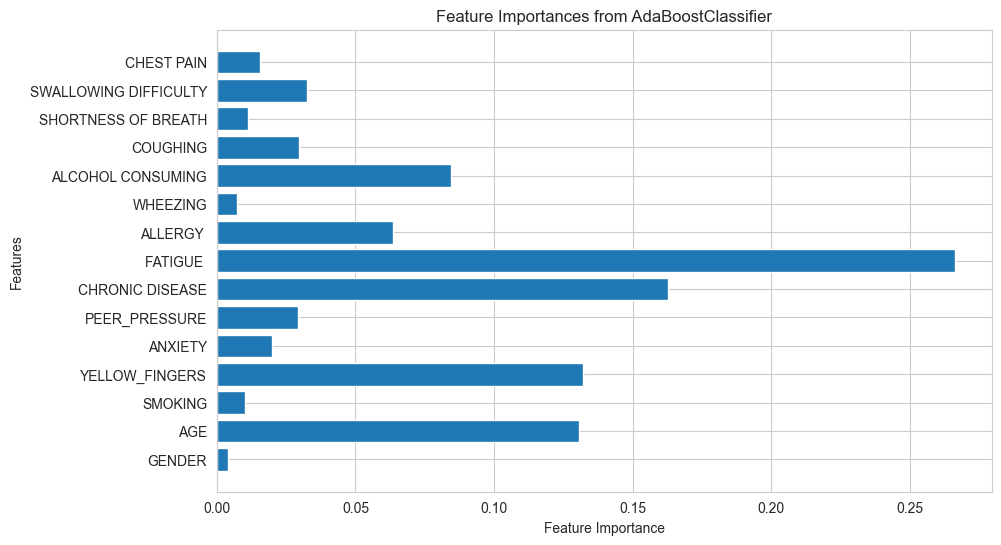

In [54]:
plt.figure(figsize=(10,6))
plt.barh(df.columns[:-1], adaboost_clf.feature_importances_)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from AdaBoostClassifier')

plt.show()



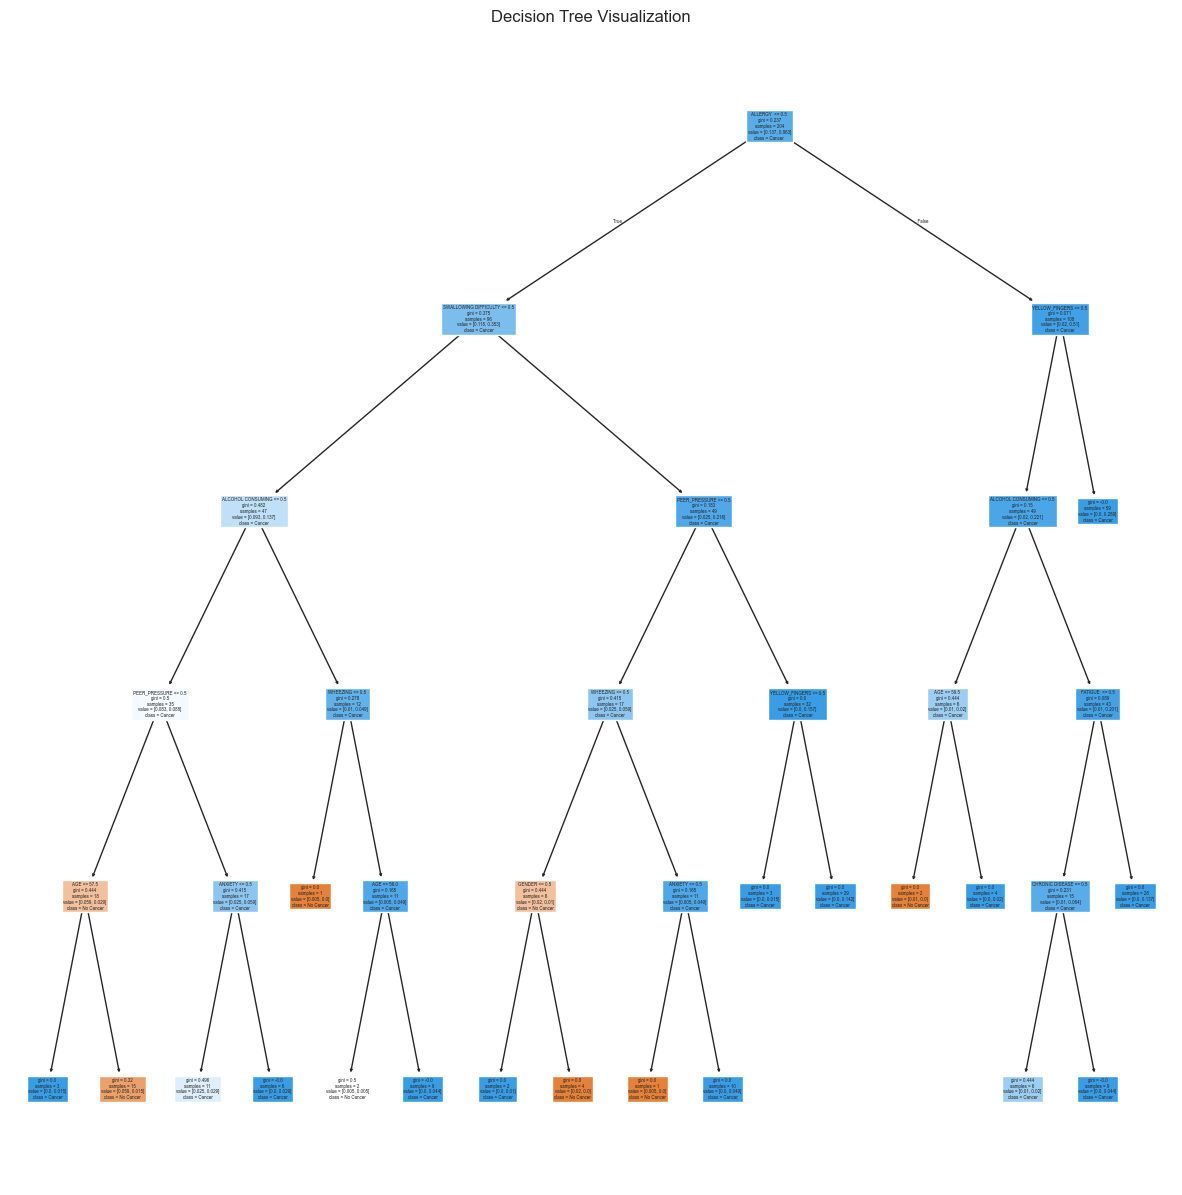

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = df.columns

plt.figure(figsize=(15,15))
plot_tree(adaboost_clf.estimators_[0],
          feature_names=feature_names,
          filled=True,
          class_names=['No Cancer', 'Cancer'])

plt.title("Decision Tree Visualization")
plt.show()


In [56]:
import gradio as gr

In [57]:
def predict_cancer(age, gender, fatigue, yellow_fingers, chronic_disease, smoking, chest_pain, anxiety, peer_pressure, allergy, wheezing, alcohol_consumption, coughing, shortness_of_breath, swallowing_difficulty):
    gender = 1 if gender == "Male" else 0
    binary_features = [fatigue, yellow_fingers, chronic_disease, smoking, chest_pain, anxiety, peer_pressure, allergy, wheezing, alcohol_consumption, coughing, shortness_of_breath, swallowing_difficulty]
    binary_features = [1 if feature == "Yes" else 0 for feature in binary_features]
    

    features = [[age, gender] + binary_features]
    prediction = best_model.predict(features)[0]

    result = "Yes" if prediction == 1 else "No"
    return f"Lung Cancer: {result}"

iface = gr.Interface( 
    fn=predict_cancer,
    inputs=[
        gr.Slider(minimum=0, maximum=100, step=1, label="Age"),
        gr.Radio(choices=["Male", "Female"], label="Gender"),
        gr.Radio(choices=["Yes", "No"], label="Fatigue"),
        gr.Radio(choices=["Yes", "No"], label="Yellow Fingers"),
        gr.Radio(choices=["Yes", "No"], label="Chronic Disease"),
        gr.Radio(choices=["Yes", "No"], label="Smoking"),
        gr.Radio(choices=["Yes", "No"], label="Chest Pain"),
        gr.Radio(choices=["Yes", "No"], label="Anxiety"),
        gr.Radio(choices=["Yes", "No"], label="Peer Pressure"),
        gr.Radio(choices=["Yes", "No"], label="Allergy"),
        gr.Radio(choices=["Yes", "No"], label="Wheezing"),
        gr.Radio(choices=["Yes", "No"], label="Alcohol Consumption"),
        gr.Radio(choices=["Yes", "No"], label="Coughing"),
        gr.Radio(choices=["Yes", "No"], label="Shortness of Breath"),
        gr.Radio(choices=["Yes", "No"], label="Swallowing Difficulty"),
    ],
    outputs="text",
    title="Lung Cancer Prediction",
    description="Enter the features for detecting Lung cancer"
)
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7866
Running on public URL: https://9d26dbb813f290488f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
